# Get fish image from thunder

In [1]:
#install and import thunder lib
!pip3 install thunder-python
import thunder as td

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from thunder import images
data = images.fromrandom() #Generate random image data

In [3]:
#install pyspark
!pip3 install pyspark
from pyspark import SparkContext, SparkConf
conf = SparkConf().setAppName("sample_app")
sc = SparkContext(conf=conf) #Initialization a SparkContext

Defaulting to user installation because normal site-packages is not writeable


22/07/20 01:06:24 WARN Utils: Your hostname, lan-HP-Pavilion-Laptop-15-cs1xxx resolves to a loopback address: 127.0.1.1; using 192.168.1.15 instead (on interface wlo1)
22/07/20 01:06:24 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
22/07/20 01:06:25 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [4]:
data = images.fromrandom(engine=sc)  # get data in spark mode

In [5]:
!pip3 install showit
import matplotlib.pyplot as plt
from showit import image, tile

Defaulting to user installation because normal site-packages is not writeable


In [6]:
data = td.images.fromexample('fish', engine=sc) #Load a sample data name = fish

In [7]:
print(data)
img = data.first()

Images
mode: spark
dtype: uint8
shape: (20, 2, 76, 87)


22/07/20 01:07:17 WARN BlockManager: Task 3 already completed, not releasing lock for rdd_4_0


In [8]:
#import lib to save fish img
from tkinter import *
from matplotlib import pyplot as plt
from PIL import Image, ImageTk
import numpy as np

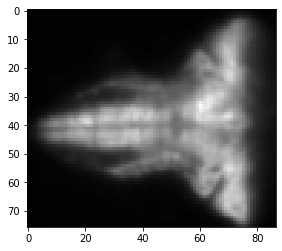

In [9]:
im_plt = plt.imshow(img[0, :, :], interpolation='nearest', aspect='equal', cmap = 'gray')

In [10]:
image1 = Image.fromarray(np.uint8( im_plt.get_cmap()(im_plt.get_array())*255)) #convert to PIL image

In [11]:
image1.save("fish.png") #save image

# Set selfies as Background of fish image

In [12]:
import pixellib
from pixellib.tune_bg import alter_bg
!pip3 install opencv-python
import cv2

2022-07-20 01:07:41.390838: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-20 01:07:41.391022: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-07-20 01:07:49.025385: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-07-20 01:07:49.066098: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-20 01:07:49.066167: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-20 01:07:49.066234: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running 

Defaulting to user installation because normal site-packages is not writeable


In [13]:
#load model
change_bg = alter_bg(model_type = "pb")
change_bg.load_pascalvoc_model("xception_pascalvoc.pb")

2022-07-20 01:07:54.967150: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-07-20 01:07:54.968040: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-07-20 01:08:01.183080: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set


In [14]:
# change background
change_bg.change_bg_img(f_image_path = "fish.png",
                        b_image_path = "lan.jpg", 
                        output_image_name="output_image.jpg")

2022-07-20 01:08:03.598134: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:196] None of the MLIR optimization passes are enabled (registered 0 passes)
2022-07-20 01:08:03.684039: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1800000000 Hz


array([[[ 64,  71,  86],
        [130, 137, 154],
        [204, 210, 221],
        ...,
        [ 79, 127, 129],
        [119, 124, 132],
        [217, 215, 227]],

       [[167, 180, 198],
        [152, 162, 182],
        [154, 161, 178],
        ...,
        [130, 144, 151],
        [103, 119, 126],
        [138, 138, 148]],

       [[ 37,  58,  69],
        [105, 123, 138],
        [ 87, 109, 124],
        ...,
        [161, 167, 182],
        [126, 147, 158],
        [143, 144, 157]],

       ...,

       [[108, 122, 151],
        [113, 126, 154],
        [ 96, 107, 139],
        ...,
        [111, 124,  27],
        [120, 133,  27],
        [123, 137,  26]],

       [[ 90, 103, 133],
        [142, 154, 182],
        [ 97, 109, 137],
        ...,
        [ 77,  96,  27],
        [106, 120,  26],
        [ 73,  86,  26]],

       [[ 29,  43,  68],
        [ 67,  79, 107],
        [108, 124, 150],
        ...,
        [101, 110,  26],
        [125, 139,  26],
        [ 91, 105,  26]]

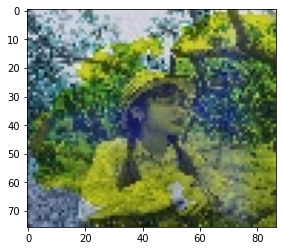

In [15]:
#show image changed background
img2 = cv2.imread("output_image.jpg")
plt.imshow(img2)

# Extract histogram

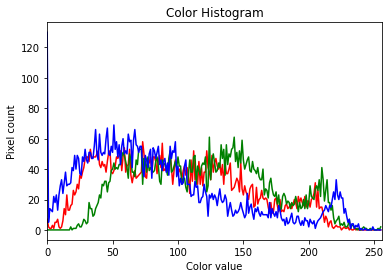

In [16]:
# tuple to select colors of each channel line
colors = ("red", "green", "blue")
channel_ids = (0, 1, 2)

# create the histogram plot, with three lines, one for
# each color
plt.figure()
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        img2[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.title("Color Histogram")
plt.xlabel("Color value")
plt.ylabel("Pixel count")

plt.show()